# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = "6669.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3389654284.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-30,1665.231445,1776.894195,1665.231445,1776.894195,1906921
1,2024-10-01,1704.070557,1728.345066,1674.941145,1679.796047,1055201
2,2024-10-04,1679.796143,1733.200066,1679.796143,1708.925555,1653757
3,2024-10-07,1655.521606,1723.490235,1650.666704,1713.780431,1453449
4,2024-10-08,1694.360840,1708.925546,1655.521623,1655.521623,937474
...,...,...,...,...,...,...
233,2025-09-16,3200.000000,3305.000000,3200.000000,3205.000000,1459607
234,2025-09-17,3160.000000,3230.000000,3155.000000,3195.000000,1213382
235,2025-09-18,3200.000000,3260.000000,3140.000000,3160.000000,1548437
236,2025-09-19,3230.000000,3265.000000,3210.000000,3230.000000,1160624


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [4]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
233,2025-09-16,3200.0,3305.0,3200.0,3205.0,1459607,3180.000,3075.769231,3051.75
234,2025-09-17,3160.0,3230.0,3155.0,3195.0,1213382,3196.875,3090.769231,3060.50
235,2025-09-18,3200.0,3260.0,3140.0,3160.0,1548437,3206.250,3118.846154,3069.00
236,2025-09-19,3230.0,3265.0,3210.0,3230.0,1160624,3233.750,3145.384615,3082.00
237,2025-09-22,3125.0,3245.0,3125.0,3240.0,1294142,3210.625,3160.769231,3085.75


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
233,2025-09-16,3200.0,3305.0,3200.0,3205.0,1459607,3180.000,3075.769231,3051.75,-20.0,0.0,20.0,42.142857,26.785714,1.573333,61.139896
234,2025-09-17,3160.0,3230.0,3155.0,3195.0,1213382,3196.875,3090.769231,3060.50,-40.0,0.0,40.0,42.142857,28.928571,1.456790,59.296482
235,2025-09-18,3200.0,3260.0,3140.0,3160.0,1548437,3206.250,3118.846154,3069.00,40.0,40.0,0.0,45.000000,28.214286,1.594937,61.463415
236,2025-09-19,3230.0,3265.0,3210.0,3230.0,1160624,3233.750,3145.384615,3082.00,30.0,30.0,0.0,47.142857,18.928571,2.490566,71.351351
237,2025-09-22,3125.0,3245.0,3125.0,3240.0,1294142,3210.625,3160.769231,3085.75,-105.0,0.0,105.0,43.571429,26.428571,1.648649,62.244898


## 1.3 計算平滑異同移動平均線（MACD）

In [6]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-30,1665.231445,1776.894195,1665.231445,1776.894195,1906921,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1665.231445,1665.231445,0.000000
1,2024-10-01,1704.070557,1728.345066,1674.941145,1679.796047,1055201,NaN,NaN,NaN,38.839111,38.839111,0.000000,NaN,NaN,NaN,NaN,1673.862359,1670.779890,3.082469
2,2024-10-04,1679.796143,1733.200066,1679.796143,1708.925555,1653757,NaN,NaN,NaN,-24.274414,0.000000,24.274414,NaN,NaN,NaN,NaN,1675.180978,1672.067926,3.113052


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

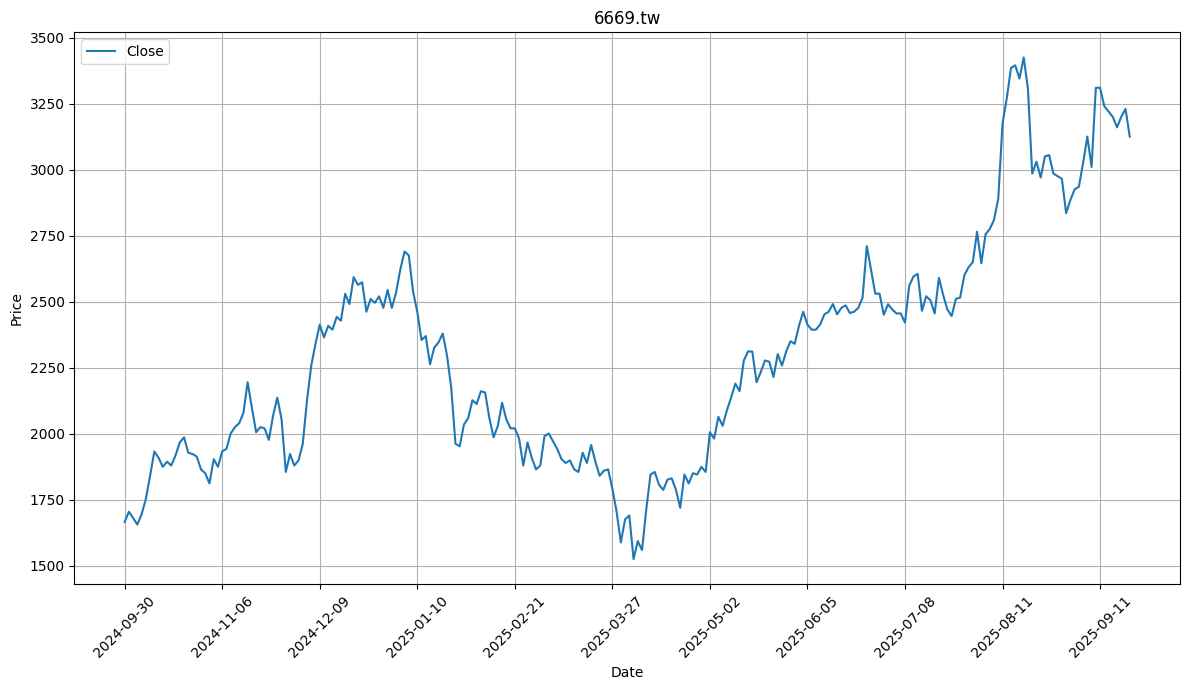

In [7]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

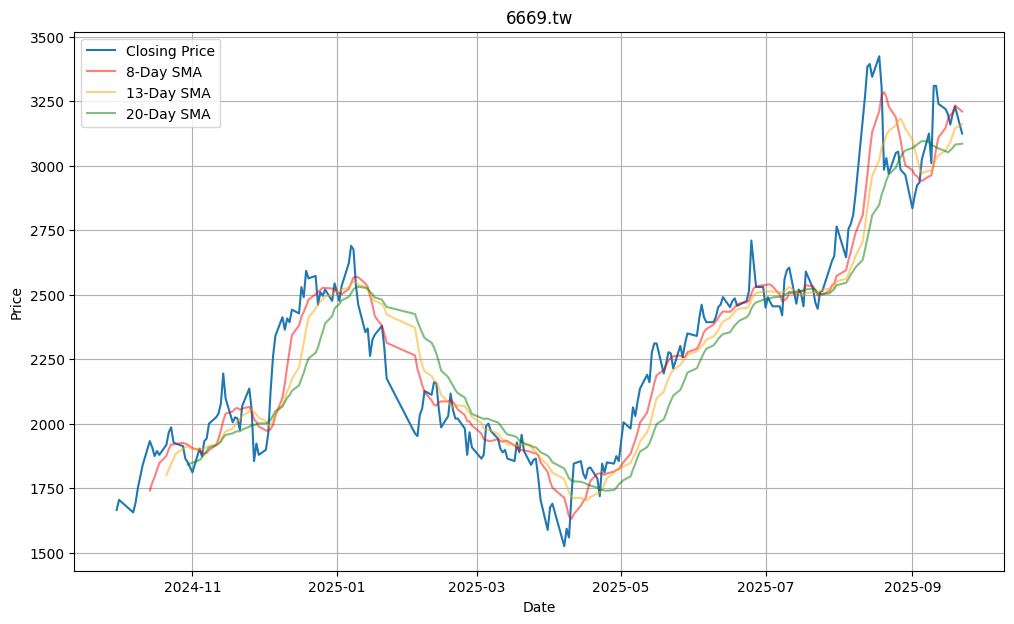

In [8]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [9]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


In [10]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-17'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-11,3310.0,3365.0,3260.0,3350.0,3300883,3065.625,3026.153846,3072.50,0.0,0.0,0.0,48.214286,23.928571,2.014925,66.831683,3124.636226,3083.802009,40.834217
2025-09-12,3240.0,3375.0,3220.0,3355.0,1991294,3110.000,3040.384615,3067.25,-70.0,0.0,70.0,42.500000,28.928571,1.469136,59.500000,3150.272620,3106.116007,44.156613
2025-09-15,3220.0,3245.0,3155.0,3210.0,1257831,3146.875,3058.461538,3057.00,-20.0,0.0,20.0,42.142857,30.357143,1.388235,58.128079,3165.767594,3122.385149,43.382444
2025-09-16,3200.0,3305.0,3200.0,3205.0,1459607,3180.000,3075.769231,3051.75,-20.0,0.0,20.0,42.142857,26.785714,1.573333,61.139896,3173.374795,3133.472985,39.901810
2025-09-17,3160.0,3230.0,3155.0,3195.0,1213382,3196.875,3090.769231,3060.50,-40.0,0.0,40.0,42.142857,28.928571,1.456790,59.296482,3170.402618,3137.262559,33.140060


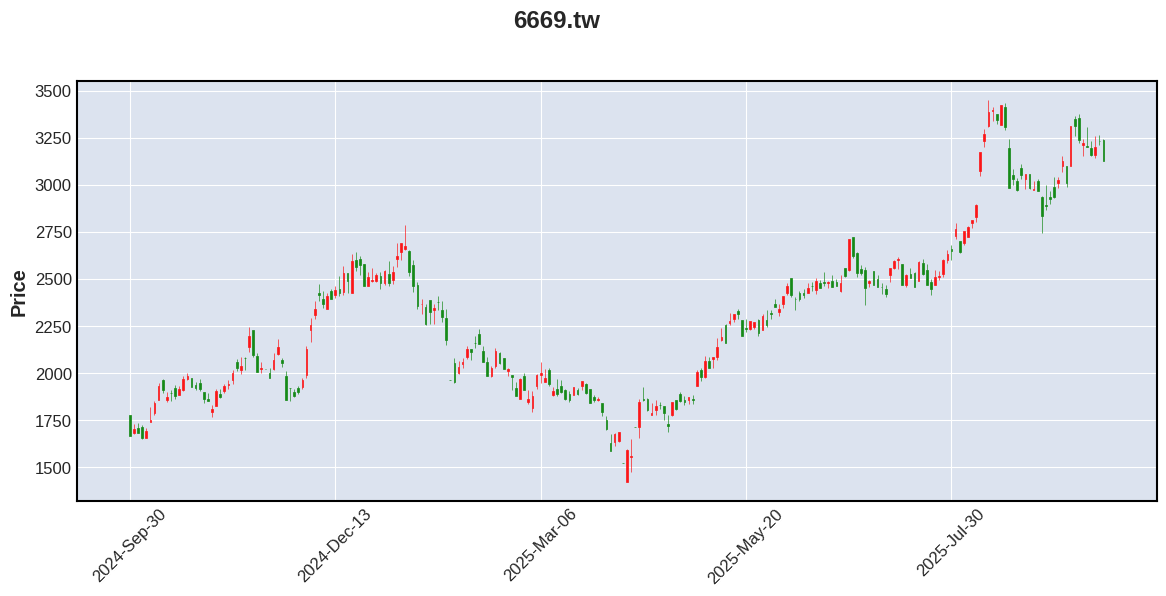

In [11]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [12]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-10,2111.882324,2126.447030,2068.188207,2126.447030,1284086,2089.428452,2184.332454,2313.603558,-14.564697,0.000000,...,21.847063,46.815133,0.466667,31.818183,2123.956157,2180.689072,-56.732915,14.564706,43.694117,0.0
2025-02-24,1980.800049,1990.509853,1907.976518,1990.509853,2899029,2032.990234,2067.441350,2100.958856,-38.839233,0.000000,...,25.314845,23.234174,1.089552,52.142856,2038.641628,2070.392934,-31.751306,9.709804,72.823531,0.0
2025-05-08,2087.607910,2087.607910,2029.349085,2073.043204,2192328,1967.449051,1903.868511,1870.593762,58.258911,58.258911,...,35.024649,16.298593,2.148937,68.243252,1984.068780,1936.856617,47.212163,14.564706,43.694119,0.0
2025-08-26,3055.000000,3055.000000,2975.000000,3030.000000,1156483,3145.625000,3175.384615,3015.500000,5.000000,5.000000,...,59.285714,39.285714,1.509091,60.144928,3087.778214,3068.278505,19.499709,25.000000,55.000000,0.0


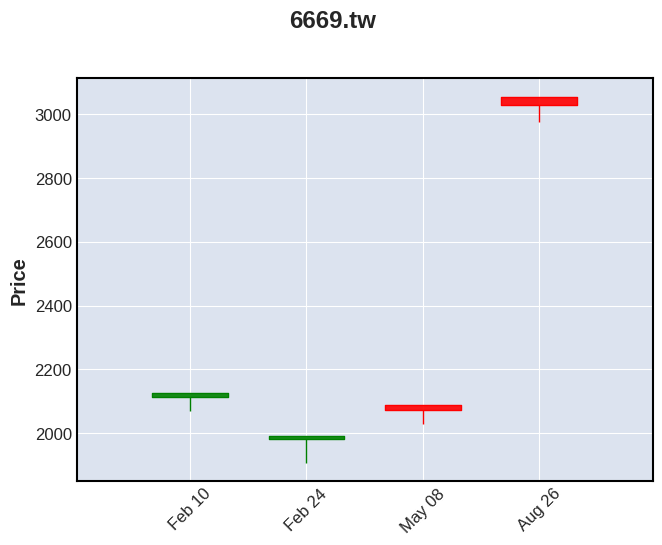

In [13]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [14]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-17,1893.411743,1907.976449,1849.717626,1893.411743,1088371,1818.767654,NaN,NaN,19.419556,19.419556,...,NaN,NaN,NaN,NaN,1834.705999,1795.314189,39.391811,0.000000,43.694117,14.564706
2024-11-07,1941.960815,1961.380424,1912.831403,1937.105913,1522031,1886.129425,1908.349947,1894.382758,9.709839,9.709839,...,19.072832,15.605042,1.222222,55.000005,1901.886995,1890.063880,11.823115,4.854902,24.274510,19.419608
2024-11-13,2077.897949,2087.607753,2014.784226,2077.897949,2370656,1974.124512,1934.865169,1929.823541,38.839111,38.839111,...,21.153495,14.564706,1.452380,59.223293,1991.472807,1959.160784,32.312024,0.000000,63.113723,9.709804
2024-11-19,2024.494141,2058.478455,2000.219631,2019.639239,1609624,2057.871582,1994.244357,1967.691785,19.419556,19.419556,...,30.863307,19.419608,1.589286,61.379312,2036.609757,2009.780776,26.828981,4.854902,19.419608,33.984314
2024-11-20,2019.639282,2019.639282,2019.639282,2019.639282,1164226,2060.299042,2010.302885,1970.361981,-4.854858,0.000000,...,30.863307,18.726048,1.648148,62.237767,2032.838540,2011.189134,21.649406,0.000000,0.000000,0.000000
2024-11-28,1922.541260,1922.541260,1849.717727,1922.541260,3123258,2006.895142,2036.071223,1997.792181,67.968628,67.968628,...,31.556876,37.105329,0.850467,45.959602,1990.389642,1997.109588,-6.719946,0.000000,72.823533,0.000000
2024-12-26,2495.419678,2558.533405,2480.854971,2490.564776,1291452,2526.976501,2480.854943,2356.326697,-14.564697,0.000000,...,30.516532,19.419608,1.571429,61.111115,2494.497188,2450.163668,44.333520,4.854902,9.709804,63.113727
2025-01-14,2369.192139,2393.466648,2315.788218,2364.337237,1483695,2530.617676,2519.694148,2523.820813,14.564697,14.564697,...,26.355190,32.943987,0.800000,44.444444,2478.112451,2490.084169,-11.971719,4.854902,48.549019,24.274510
2025-01-17,2344.917725,2364.337333,2262.384389,2335.207920,1734354,2416.527466,2476.746939,2489.836499,19.419678,19.419678,...,27.048758,39.532785,0.684211,40.625010,2393.135329,2425.294172,-32.158843,9.709804,72.823532,19.419608


In [15]:
doji_df.index

DatetimeIndex(['2024-10-17', '2024-11-07', '2024-11-13', '2024-11-19',
               '2024-11-20', '2024-11-28', '2024-12-26', '2025-01-14',
               '2025-01-17', '2025-01-20', '2025-02-03', '2025-02-11',
               '2025-03-06', '2025-04-07', '2025-04-09', '2025-04-10',
               '2025-04-18', '2025-05-20', '2025-06-06', '2025-06-12',
               '2025-07-07', '2025-07-11', '2025-08-14', '2025-08-28',
               '2025-09-02', '2025-09-16', '2025-09-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

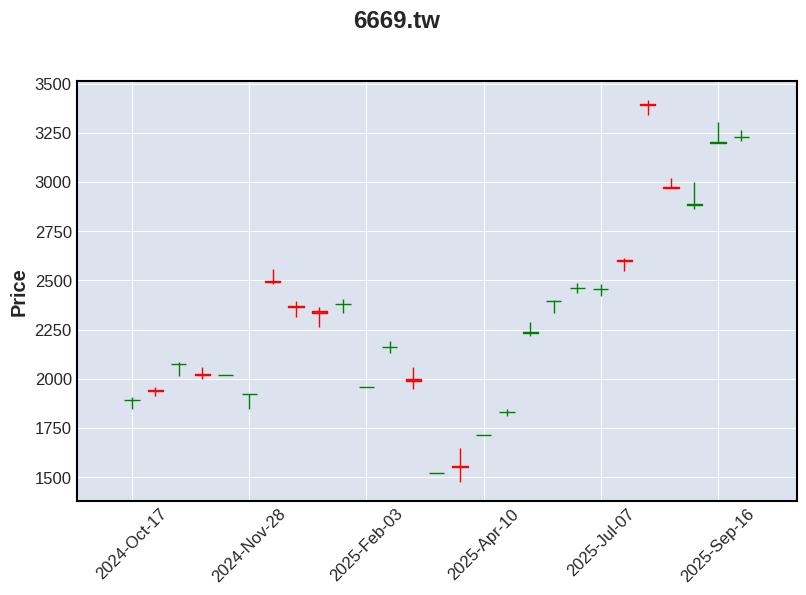

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [17]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [18]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((218, 3), (218,))

In [19]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((174, 3), (44, 3), (174,), (44,))

## 3.2 線性回歸（Linear Regression）

In [20]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 162.62
線性回歸模型預測未來1天的價格: 3111.33


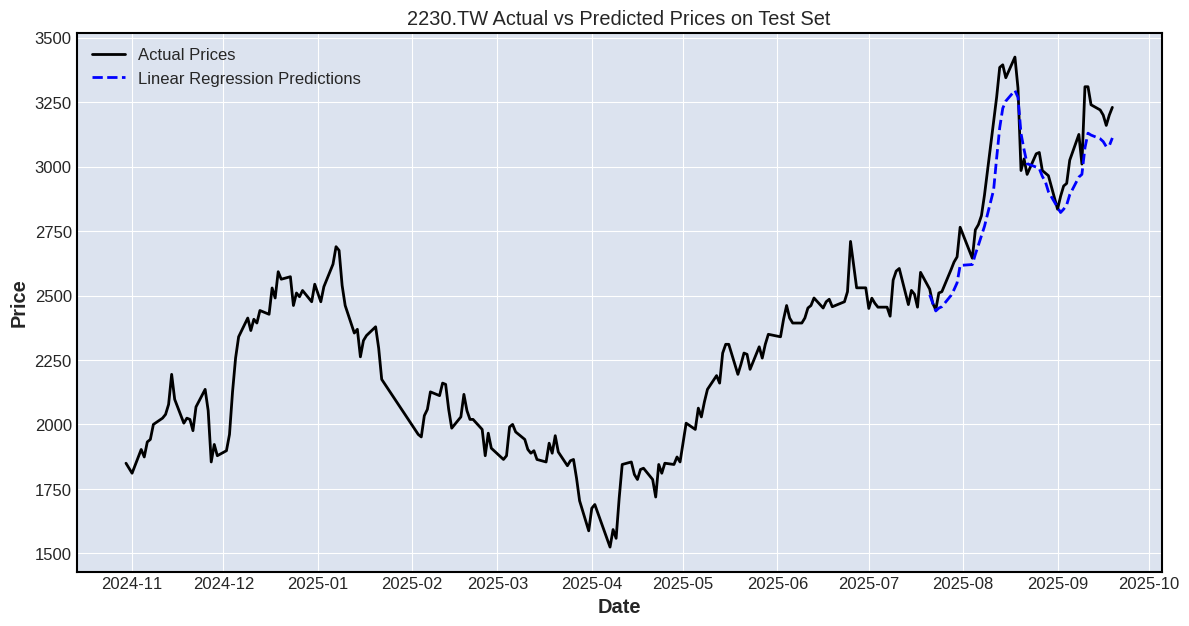

In [21]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6669.TW Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [22]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 567.25
決策樹模型預測未來1天的價格: 2539.11


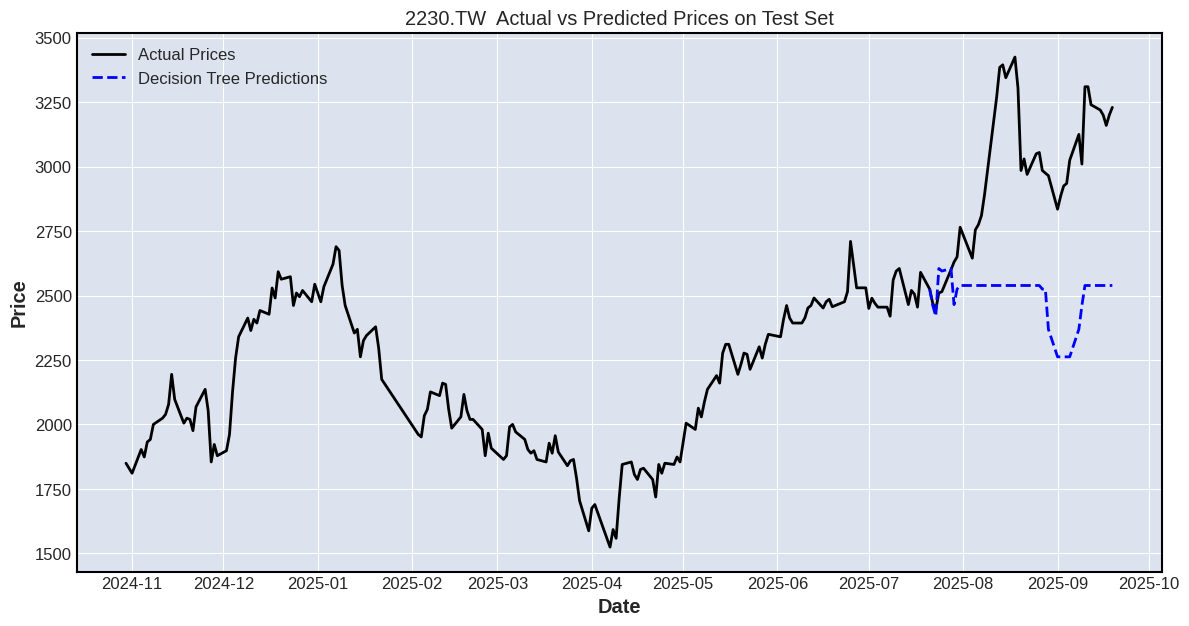

In [23]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6669.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [24]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 588.14
隨機森林模型預測未來1天的價格: 2495.38


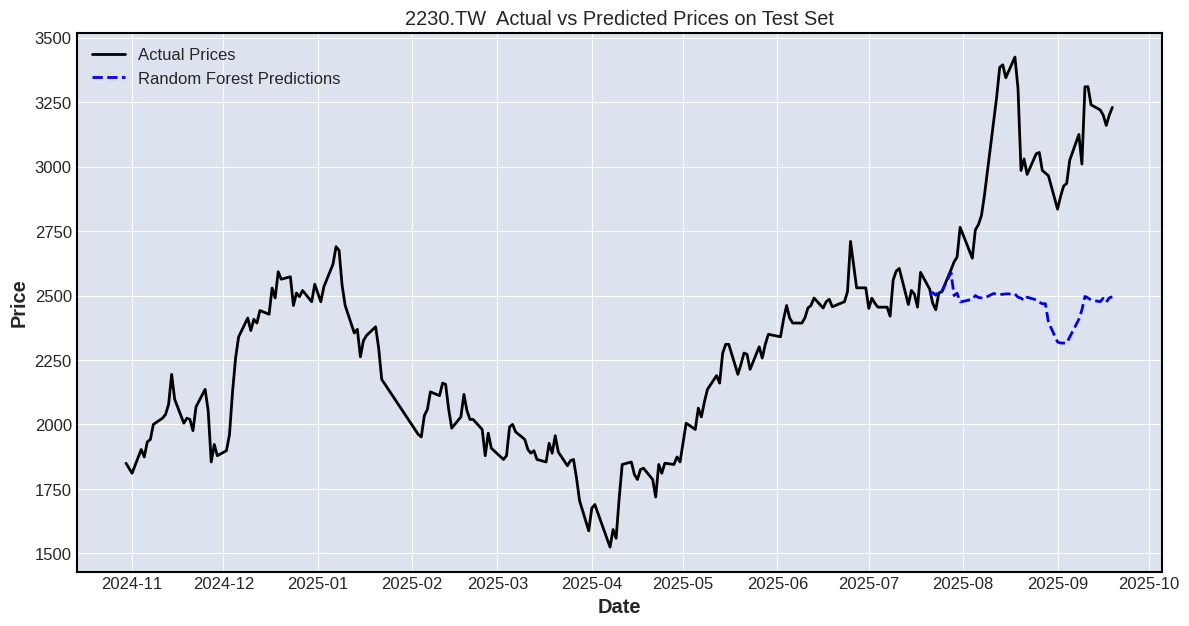

In [25]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('6669.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 補充：在 Colab 上使用中文字體

In [26]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-09-23 15:02:52--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.217.101, 173.194.217.113, 173.194.217.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-23 15:02:52--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.139.132, 2607:f8b0:400c:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.139.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  64.7MB/s    in 0.3s    

2025-09-23 15

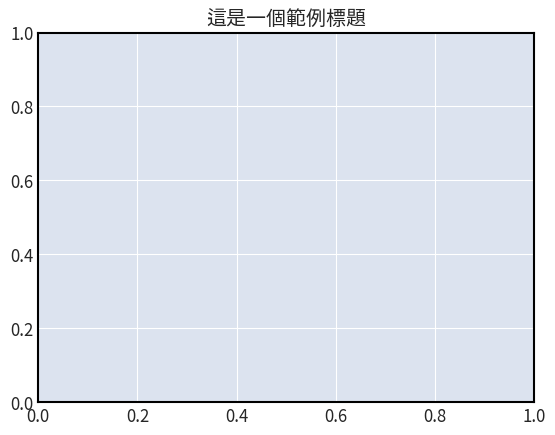

In [27]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

# Pandas Shift

In [28]:
temp_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-10-11,111
1,2024-10-12,222
2,2024-10-13,333
3,2024-10-14,444
4,2024-10-15,555
5,2024-10-16,666


In [29]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0
5,2024-10-16,666,NaN


In [30]:
temp_df.dropna(inplace=True)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0


In [31]:
sk_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    '技術指標1': [111, 222, 333, 444, 555, 666],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
0,2024-10-11,111,111,111,111,356
1,2024-10-12,222,222,222,222,363
2,2024-10-13,333,333,333,333,368
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


In [32]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366
